In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
# la otra forma, pero con mismo resultado: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
### para que funcione necesitas bajarte los archivos de datos de Kaggle :) 
df = pd.read_csv("data/train_set.csv")

In [3]:
df

0   1  2   3  4  5           6  7  8    9      10    11  \
0      161528   6  a   6  X  2  gynecology  R  F  4.0   45810   2.0   
1      159472  23  a   6  X  4  gynecology  Q  F  2.0  128565  15.0   
2      309765   2  c   5  Z  2  anesthesia  S  F  3.0   46565   5.0   
3      279614  32  f   9  Y  3  gynecology  S  B  4.0  124546   6.0   
4      147791  14  a   1  X  3  gynecology  S  E  2.0   22729   8.0   
...       ...  .. ..  .. .. ..         ... .. ..  ...     ...   ...   
99995  237869  12  a   9  Y  3  gynecology  R  B  3.0   82914   3.0   
99996  254763  28  b  11  X  2  gynecology  R  F  2.0   40026   5.0   
99997   69788   6  a   6  X  3  gynecology  Q  F  3.0   92346   2.0   
99998  204442  32  f   9  Y  2  gynecology  S  B  4.0  113798  15.0   
99999   69647  25  e   1  X  3  gynecology  Q  E  2.0  109237   8.0   

              12        13  14     15      16                  17  
0         Urgent  Moderate   2  21-30  2817.0                0-10  
1         Trauma  Moderate   4  51-60  4498.0               21-30  
2         Urgent  Moderate   2  71-80  4573.0               11-20  
3      Emergency  Moderate   4  11-20  7202.0               51-60  
4         Urgent  Moderate   2  51-60  3398.0               51-60  
...          ...       ...  ..    ...     ...                 ...  
99995  Emergency  Moderate   6  51-60  3966.0  More than 100 Days  
99996     Urgent  Moderate   3  21-30  4005.0               51-60  
99997     Trauma     Minor   2  31-40  5215.0               31-40  
99998     Trauma  Moderate   3  41-50  5092.0               11-20  
99999  Emergency  Moderate   2  41-50  3390.0               41-50  

[100000 rows x 18 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [5]:
df.shape

(100000, 18)

## EDA

In [6]:
# Checking for null values

df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9       33
10       0
11    1483
12       0
13       0
14       0
15       0
16       0
17       0
dtype: int64

In [7]:
# Visualizing the NULL observations

df[df['11'].isnull()]

0   1  2   3  4  5           6  7  8    9      10  11         12  \
22     115968  23  a   6  X  3  gynecology  R  F  3.0   31502 NaN  Emergency   
32     237953  28  b  11  X  3  anesthesia  R  F  4.0   46206 NaN     Trauma   
62     316165  23  a   6  X  7  gynecology  Q  F  2.0   71808 NaN     Trauma   
80     149141   9  d   5  Z  5  gynecology  Q  F  4.0  100594 NaN     Trauma   
105    242959  14  a   1  X  4  gynecology  Q  E  4.0   32377 NaN  Emergency   
...       ...  .. ..  .. .. ..         ... .. ..  ...     ...  ..        ...   
99826   30816  15  c   5  Z  2  gynecology  R  F  3.0  118693 NaN     Urgent   
99888  171194  28  b  11  X  4  gynecology  R  F  1.0   27835 NaN     Trauma   
99892  276580  10  e   1  X  5  gynecology  Q  E  2.0  101453 NaN  Emergency   
99945  185416  23  a   6  X  4  anesthesia  Q  F  4.0   54725 NaN     Trauma   
99977  189832  11  b   2  Y  4  gynecology  Q  D  2.0   16810 NaN  Emergency   

             13  14     15      16     17  
22        Minor   3  31-40  3303.0  21-30  
32     Moderate   8  51-60  3701.0  71-80  
62      Extreme   4  71-80  4917.0  21-30  
80        Minor   4  71-80  5057.0  21-30  
105       Minor   4  21-30  4927.0  31-40  
...         ...  ..    ...     ...    ...  
99826   Extreme   4  41-50  5104.0  71-80  
99888   Extreme   2  31-40  4617.0  21-30  
99892  Moderate   2  41-50  4514.0  21-30  
99945  Moderate   3  71-80  5768.0  21-30  
99977   Extreme   4  31-40  3923.0  11-20  

[1483 rows x 18 columns]

### Making categorical variables into numeric 

In [8]:
from sklearn.preprocessing import LabelEncoder

In [99]:
# Creating dictionary of encoded categorical columns

encod_cols = [2,4,6,7,8,12,13,15]
encoder = {}
d = {}

for col in encod_cols:
    encoder[f'lab{col}'] = LabelEncoder()
    encoder[f'lab{col}'].fit(df[f'{col}'])
    d[f'lab{col}'] = encoder[f'lab{col}'].transform(df[f'{col}'])

In [25]:
# Subsituting categorical columns for encoded values

df_encoded = df.copy()

for col in encod_cols:
    df_encoded[f'{col}'] = d[f'lab{col}']

df_encoded.head()

0   1  2  3  4  5  6  7  8    9      10    11  12  13  14  15      16  \
0  161528   6  0  6  0  2  2  2  5  4.0   45810   2.0   2   2   2   2  2817.0   
1  159472  23  0  6  0  4  2  1  5  2.0  128565  15.0   1   2   4   5  4498.0   
2  309765   2  2  5  2  2  1  3  5  3.0   46565   5.0   2   2   2   7  4573.0   
3  279614  32  5  9  1  3  2  3  1  4.0  124546   6.0   0   2   4   1  7202.0   
4  147791  14  0  1  0  3  2  3  4  2.0   22729   8.0   2   2   2   5  3398.0   

      17  
0   0-10  
1  21-30  
2  11-20  
3  51-60  
4  51-60

In [30]:
# Deleting the NULL values
df_encoded = df_encoded.dropna(subset = ['11'])
df_encoded = df_encoded.dropna(subset = ['9'])

# Visualizing the NULL observations
df_encoded.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

### Checking column importance

In [55]:
X_df = df_encoded.iloc[:, 1:17]
y_serie = df_encoded['17']

In [56]:
print(df.shape)
print(df_encoded.shape)

(100000, 18)
(98484, 18)


In [57]:
# Decision tree
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X_df,y_serie)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [58]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(X_df):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])



fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index(drop=True)

fi_df

Feature  Feature Importance
0       14            0.441625
1        7            0.218574
2       16            0.072837
3       12            0.047633
4        9            0.044176
5       10            0.027177
6        3            0.024702
7       11            0.023325
8        1            0.022612
9        2            0.016763
10       5            0.015681
11      13            0.015251
12      15            0.013698
13       8            0.007826
14       4            0.004204
15       6            0.003915

In [114]:
most_sig_cols = [14, 7, 16, 12, 9]

All columns seem to be somewhat relevant to the prediction of column 17

### Remember: If column 11 isn't too significant, drop it and bring back the null values deleted for it

--> Col 11 seems too have some relevance in the prediction of col 17. We will keep it for now although we might choose to disregard it and recuperate the left NaNs for some models

## Checking outliers

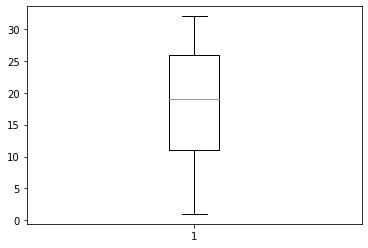

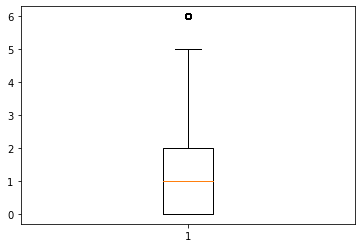

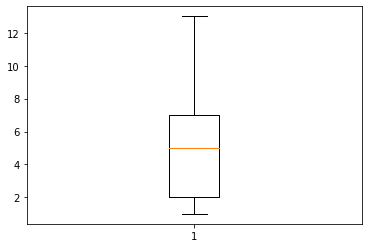

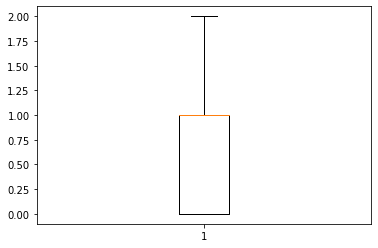

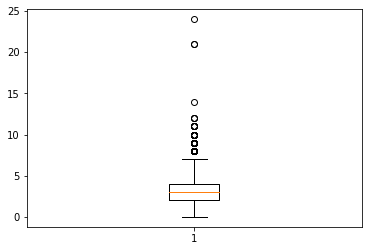

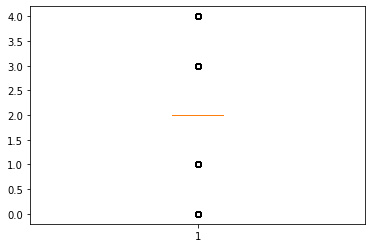

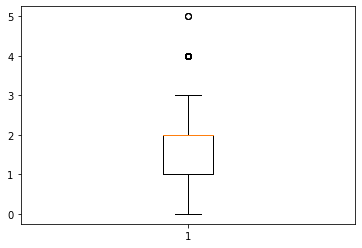

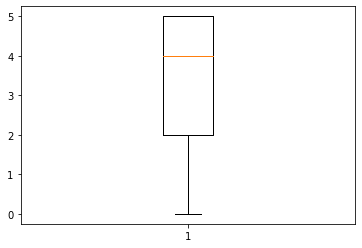

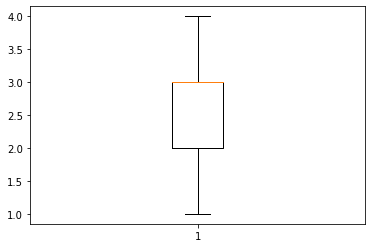

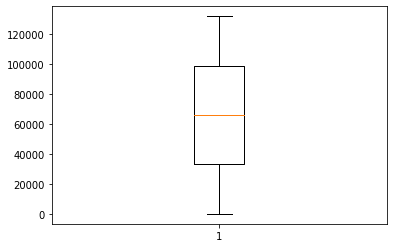

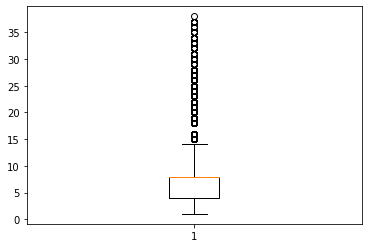

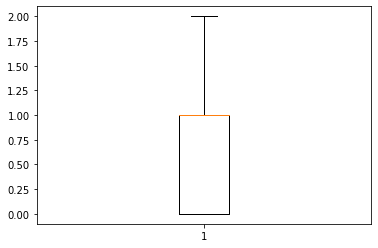

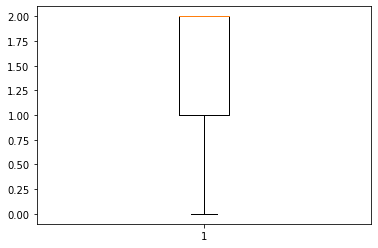

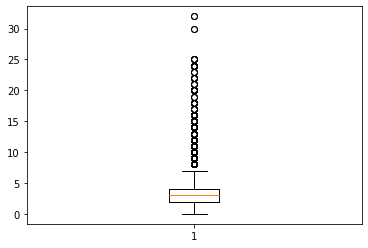

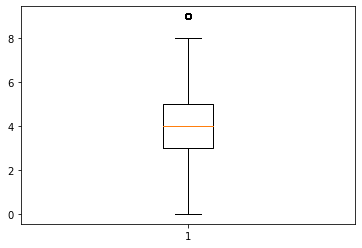

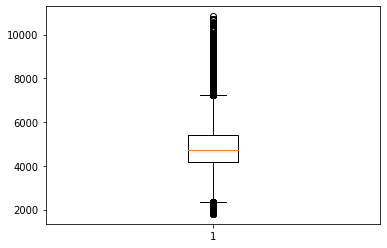

In [63]:
for col in df_encoded.iloc[:,1:17]:
    plt.boxplot(df_encoded[f'{col}'])
    plt.show()

In [67]:
# Filter out outliers from every column 

from scipy import stats
df_no_outlies = df_encoded[(np.abs(stats.zscore(df_encoded.iloc[:,1:17])) < 3).all(axis=1)]

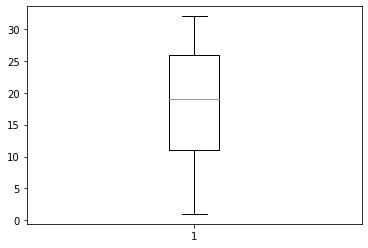

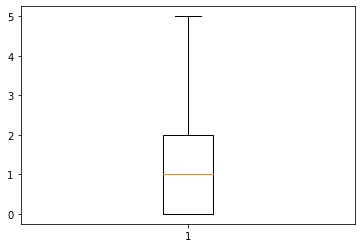

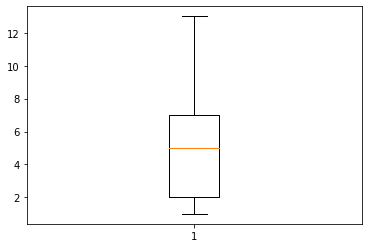

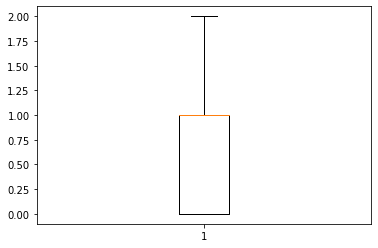

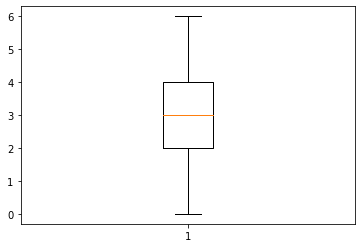

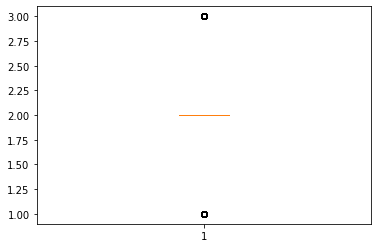

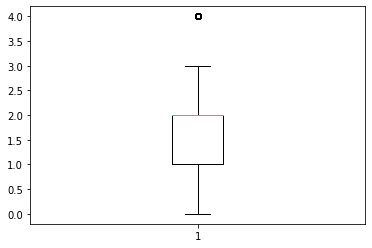

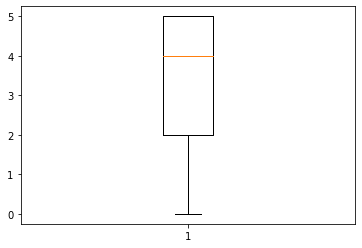

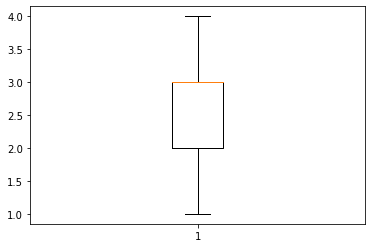

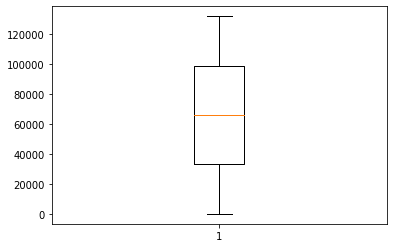

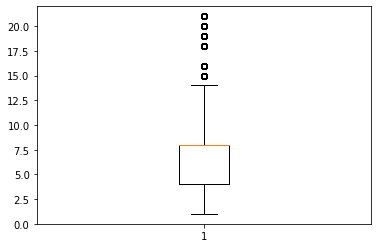

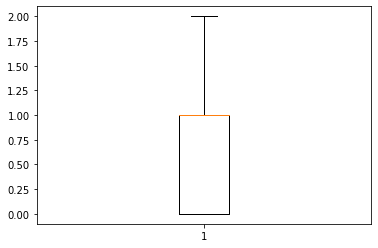

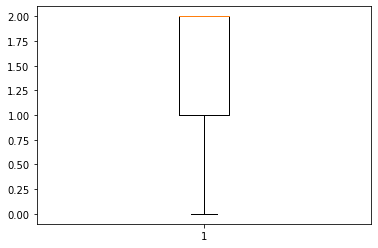

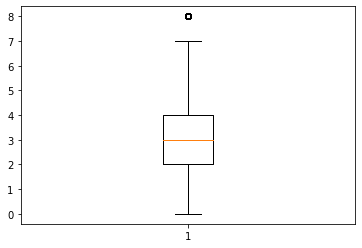

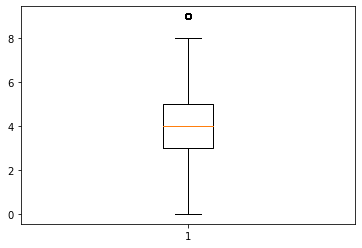

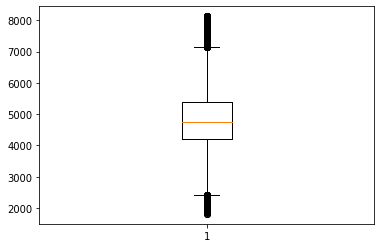

In [78]:
for col in df_no_outlies.iloc[:,1:17]:
    plt.boxplot(df_no_outlies[f'{col}'])
    plt.show()

In [76]:
print('df shape -->', df.shape, '\n-------')
print('df_encoded shape', df_encoded.shape, '\t,', 'row dif with df', df.shape[0]-df_encoded.shape[0], '\n-------')
print('df_encoded shape', df_no_outlies.shape, '\t,', 'row dif with df', df.shape[0]-df_no_outlies.shape[0], '\t,', 'row dif with df_encoded', df_encoded.shape[0]-df_no_outlies.shape[0])

df shape --> (100000, 18) 
-------
df_encoded shape (98484, 18) 	, row dif with df 1516 
-------
df_encoded shape (87634, 18) 	, row dif with df 12366 	, row dif with df_encoded 10850


# Models

## With encoded dataset

In [80]:
# Separamos variables dependientes de independientes

X = df_encoded.iloc[:, 1:17].values
y = df_encoded['17']

In [93]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state=0)

# Crear modelo
model = linear_model.LogisticRegression()

# Entrenar modelo
model.fit(X_train, y_train)

LogisticRegression()

In [94]:
# Predicciones sobre muestra de entrenamiento
model.score(X_train, y_train)

0.27439806059375277

In [95]:
# Predicciones sobre muestra de testeo
model.score(X_test, y_test)

0.27593034472254657

### Prediction to submit:

In [90]:
to_pred = pd.read_csv("data/test_set.csv")
to_pred = to_pred.fillna(0)

In [101]:
# Encode categorical values

encod_cols = [2,4,6,7,8,12,13,15]

for col in encod_cols:
    to_pred[f'{col}'] = encoder[f'lab{col}'].transform(to_pred[f'{col}'])

# Predict
predictions_submit = model.predict(to_pred.iloc[:,1:17])

In [102]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

id   days
0       314114  21-30
1       208989  21-30
2       305872  21-30
3       266099  21-30
4        13228  21-30
...        ...    ...
133739  318155  21-30
133740  144850  21-30
133741  180676  21-30
133742   39933  21-30
133743  116673  21-30

[133744 rows x 2 columns]

In [104]:
sample = pd.read_csv("data/sample_submission.csv")

if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("submissions/encode_1.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!


## Without outliers

In [146]:
# Separamos variables dependientes de independientes

X = df_no_outlies.iloc[:, 1:17].values
y = df_no_outlies['17']

In [145]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state=18)

# Crear modelo
model = linear_model.LogisticRegression()

# Entrenar modelo
model.fit(X_train, y_train)

LogisticRegression()

In [148]:
# Predicciones sobre muestra de entrenamiento
model.score(X_train, y_train)

0.2797866118932489

In [149]:
# Predicciones sobre muestra de testeo
model.score(X_test, y_test)

0.27072516688537684

### Prediction to submit:

In [150]:
to_pred = pd.read_csv("data/test_set.csv")
to_pred = to_pred.fillna(0)

In [151]:
# Encode categorical values

encod_cols = [2,4,6,7,8,12,13,15]

for col in encod_cols:
    to_pred[f'{col}'] = encoder[f'lab{col}'].transform(to_pred[f'{col}'])

# Predict
predictions_submit = model.predict(to_pred.iloc[:,1:17])

In [152]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

id   days
0       314114  21-30
1       208989  21-30
2       305872  21-30
3       266099  21-30
4        13228  21-30
...        ...    ...
133739  318155  21-30
133740  144850  21-30
133741  180676  21-30
133742   39933  21-30
133743  116673  21-30

[133744 rows x 2 columns]

In [153]:
sample = pd.read_csv("data/sample_submission.csv")

if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("submissions/no_outliers_2.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!


### Seed optimisation

In [137]:
# Crear modelo
# Separamos variables dependientes de independientes

X = df_no_outlies.iloc[:, 1:17].values
y = df_no_outlies['17']
model = linear_model.LogisticRegression(n_jobs=-1)

seed_l = []
train_score = []
test_score = []

for seed in range(20):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state=seed)
    model.fit(X_train, y_train)
    seed_l.append(seed)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))

In [138]:
score_df = pd.DataFrame({'seed': seed_l, 'Train': train_score, 'Test': train_score})

In [141]:
score_df[score_df.Train == score_df.Train.max()]

seed     Train      Test
18    18  0.279787  0.279787

In [142]:
score_df[score_df.Test == score_df.Test.max()]

seed     Train      Test
18    18  0.279787  0.279787

## 5 most significant columns/ no outliers

In [157]:
most_sig_cols = [14, 7, 16, 12, 9]

In [158]:
# Separamos variables dependientes de independientes

X = df_no_outlies.iloc[:, most_sig_cols].values
y = df_no_outlies['17']

In [159]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state=10)

# Crear modelo
model = linear_model.LogisticRegression()

# Entrenar modelo
model.fit(X_train, y_train)

LogisticRegression()

In [161]:
# Predicciones sobre muestra de entrenamiento
print(model.score(X_train, y_train))

# Predicciones sobre muestra de testeo
model.score(X_test, y_test)

0.3477113554994508


0.34078849774633424

### Prediction to submit:

In [162]:
to_pred = pd.read_csv("data/test_set.csv")
to_pred = to_pred.fillna(0)

In [163]:
# Encode categorical values

encod_cols = [2,4,6,7,8,12,13,15]

for col in encod_cols:
    to_pred[f'{col}'] = encoder[f'lab{col}'].transform(to_pred[f'{col}'])

# Predict
predictions_submit = model.predict(to_pred.iloc[:,most_sig_cols])

In [164]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

id   days
0       314114  11-20
1       208989  21-30
2       305872  11-20
3       266099  51-60
4        13228  21-30
...        ...    ...
133739  318155  21-30
133740  144850  21-30
133741  180676  21-30
133742   39933  21-30
133743  116673  21-30

[133744 rows x 2 columns]

In [165]:
sample = pd.read_csv("data/sample_submission.csv")

if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("submissions/5_most_relevant_2.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!


### Seed optimisation

In [154]:
# Crear modelo
# Separamos variables dependientes de independientes

most_sig_cols = [14, 7, 16, 12, 9]
X = df_no_outlies.iloc[:, most_sig_cols].values
y = df_no_outlies['17']
model = linear_model.LogisticRegression(n_jobs=-1)

seed_l = []
train_score = []
test_score = []

for seed in range(20):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state=seed)
    model.fit(X_train, y_train)
    seed_l.append(seed)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))

score_df = pd.DataFrame({'seed': seed_l, 'Train': train_score, 'Test': train_score})

In [156]:
score_df[score_df.Train == score_df.Train.max()]
score_df[score_df.Test == score_df.Test.max()]

seed     Train      Test
10    10  0.347711  0.347711

## Most Relevant Row

In [123]:
most_sig_cols = [14]

In [124]:
# Separamos variables dependientes de independientes

X = df_no_outlies.iloc[:, most_sig_cols].values
y = df_no_outlies['17']

In [125]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state=0)

# Crear modelo
model = linear_model.LogisticRegression()

# Entrenar modelo
model.fit(X_train, y_train)

LogisticRegression()

In [126]:
# Predicciones sobre muestra de entrenamiento
print(model.score(X_train, y_train))

# Predicciones sobre muestra de testeo
model.score(X_test, y_test)

0.3187413525040296


0.3185941689964055

### Prediction to submit:

In [127]:
to_pred = pd.read_csv("data/test_set.csv")
to_pred = to_pred.fillna(0)

In [128]:
# Encode categorical values

encod_cols = [2,4,6,7,8,12,13,15]

for col in encod_cols:
    to_pred[f'{col}'] = encoder[f'lab{col}'].transform(to_pred[f'{col}'])

# Predict
predictions_submit = model.predict(to_pred.iloc[:,most_sig_cols])

In [129]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})

In [130]:
sample = pd.read_csv("data/sample_submission.csv")

if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("submissions/most_relevant_col_1.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
